In [1]:
from utils import plot_history, plot_result, calc_mean_image_metrics, predict_all
from losses import ssim_l2

In [2]:
import numpy as np

import os

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, Add, Subtract
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.preprocessing import image
import tensorflow.keras.backend as K
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras import callbacks
from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
images_clear_tt = np.load('images_clear_tt.npy')
images_noised_tt = np.load('images_noised_real_035_tt.npy')
images_clear_tt = images_clear_tt[:2500]
images_noised_tt = images_noised_tt[:2500]

In [4]:
#images_noised_train, images_noised_test, images_clear_train, images_clear_test = train_test_split(images_noised_tt,
#                                                                                                 images_clear_tt,
#                                                                                                 test_size=0.2,
#                                                                                                 random_state=42)

In [5]:
def dncnn_res(img_shape):

    input = Input(img_shape)
    n_blocks = 16
    x = Conv2D(128, kernel_size=(3,3),  #bias_initializer='glorot_normal',
                                        #kernel_initializer='glorot_normal',
                                        padding='same')(input)
    x = Activation('gelu')(x)
    for i in range(n_blocks):
        xx = Conv2D(128, kernel_size=(3,3),  #bias_initializer='glorot_normal', 
                                             #kernel_initializer='glorot_normal',
                                             padding='same')(x)
        xx = BatchNormalization()(xx)
        xx = Activation('gelu')(xx)
        xx = Add()([x, xx])
        x = xx
    x = Conv2D(3, kernel_size=(3,3),  #bias_initializer='glorot_normal', 
                                      #kernel_initializer='glorot_normal',
                                      padding='same')(x)
    out = Subtract()([input, x])

    model = Model(input, out)
    model.summary()
    
    return model

In [6]:
model = dncnn_res((256,256,3))
reduce_lr = callbacks.ReduceLROnPlateau(monitor='loss',
                                        factor=0.1,
                                        patience=5)

model.compile(optimizer=Adamax(learning_rate=1e-2), loss=ssim_l2)

history = model.fit(images_noised_tt, images_clear_tt,
                    epochs=40,
                    callbacks=[reduce_lr],
                    validation_split=0.2,
                    #validation_data=(images_noised_test, images_clear_test),
                    batch_size=1)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 12  3584        ['input_1[0][0]']                
                                8)                                                                
                                                                                                  
 activation (Activation)        (None, 256, 256, 12  0           ['conv2d[0][0]']                 
                                8)                                                            

                                                                                                  
 conv2d_7 (Conv2D)              (None, 256, 256, 12  147584      ['add_5[0][0]']                  
                                8)                                                                
                                                                                                  
 batch_normalization_6 (BatchNo  (None, 256, 256, 12  512        ['conv2d_7[0][0]']               
 rmalization)                   8)                                                                
                                                                                                  
 activation_7 (Activation)      (None, 256, 256, 12  0           ['batch_normalization_6[0][0]']  
                                8)                                                                
                                                                                                  
 add_6 (Ad

                                8)                                'activation_13[0][0]']          
                                                                                                  
 conv2d_14 (Conv2D)             (None, 256, 256, 12  147584      ['add_12[0][0]']                 
                                8)                                                                
                                                                                                  
 batch_normalization_13 (BatchN  (None, 256, 256, 12  512        ['conv2d_14[0][0]']              
 ormalization)                  8)                                                                
                                                                                                  
 activation_14 (Activation)     (None, 256, 256, 12  0           ['batch_normalization_13[0][0]'] 
                                8)                                                                
          

2000/2000 [==============================] - 538s 269ms/step - loss: 0.0961 - val_loss: 0.1164 - lr: 0.0100
Epoch 32/40
2000/2000 [==============================] - 539s 270ms/step - loss: 0.0952 - val_loss: 0.0868 - lr: 0.0100
Epoch 33/40
2000/2000 [==============================] - 544s 272ms/step - loss: 0.0952 - val_loss: 0.1243 - lr: 0.0100
Epoch 34/40
2000/2000 [==============================] - 544s 272ms/step - loss: 0.0908 - val_loss: 0.0975 - lr: 0.0100
Epoch 35/40
2000/2000 [==============================] - 550s 275ms/step - loss: 0.0924 - val_loss: 0.1001 - lr: 0.0100
Epoch 36/40
2000/2000 [==============================] - 553s 276ms/step - loss: 0.0977 - val_loss: 0.1138 - lr: 0.0100
Epoch 37/40
2000/2000 [==============================] - 553s 277ms/step - loss: 0.0977 - val_loss: 0.0836 - lr: 0.0100
Epoch 38/40
2000/2000 [==============================] - 559s 280ms/step - loss: 0.0931 - val_loss: 0.1501 - lr: 0.0100
Epoch 39/40
2000/2000 [=============================

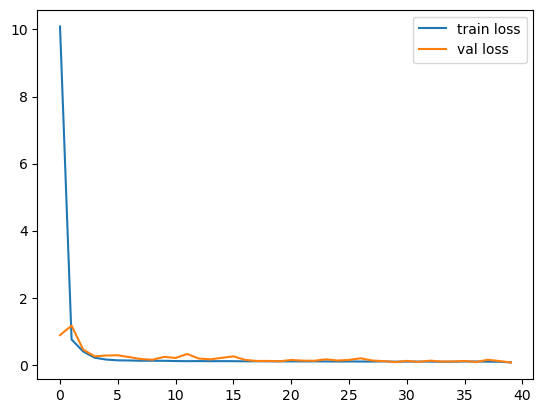

In [13]:
plot_history(history)

In [8]:
images_clear_val = np.load('images_clear_val.npy')
images_noised_val = np.load('images_noised_real_035_val.npy')
y = predict_all(model, images_noised_val)

1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 54ms/step


1/1 [==============================] - 0s 54ms/step


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 48ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mean PSNR=31.826190948486328
mean SSIM=0.9288869500160217


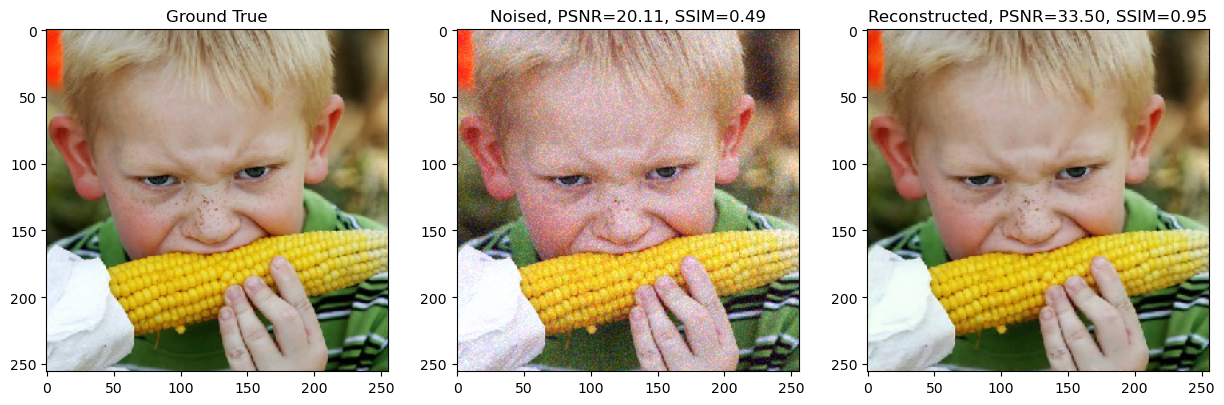

In [9]:
n=411
max_value=1
psnr, ssim = calc_mean_image_metrics(images_clear_val, y, max_value=max_value)
print (f'mean PSNR={psnr}')
print (f'mean SSIM={ssim}')
plot_result(images_clear_val[n],
            images_noised_val[n],
            y[n],
            max_value=max_value
           )

In [10]:
y_tt = predict_all(model, images_noised_tt)

1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 57ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 54ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 50ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mean PSNR=31.94802474975586
mean SSIM=0.9306377172470093


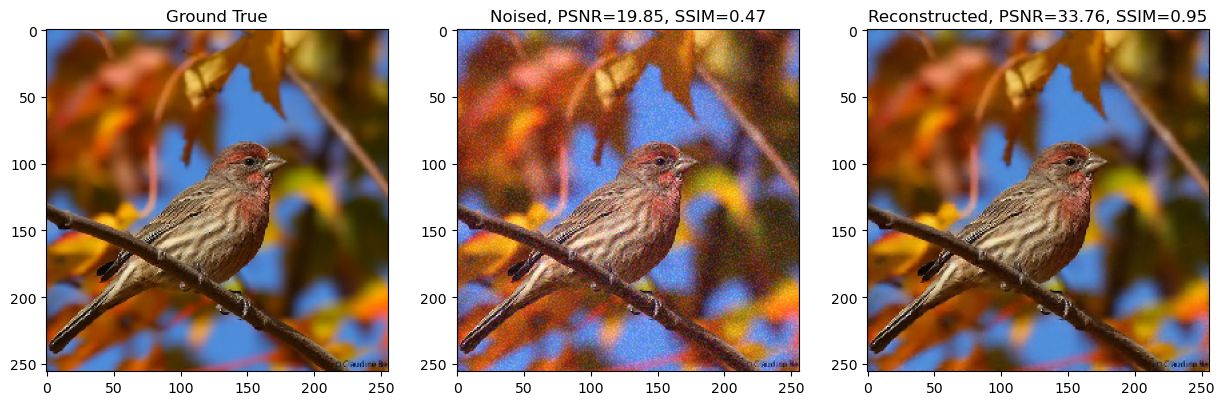

In [11]:
n=335
max_value=1
psnr, ssim = calc_mean_image_metrics(images_clear_tt, y_tt, max_value=max_value)
print (f'mean PSNR={psnr}')
print (f'mean SSIM={ssim}')
plot_result(images_clear_tt[n],
            images_noised_tt[n],
            y_tt[n],
            max_value=max_value
           )

In [12]:
#model = dncnn_res((256,256,3))
#model.save('saved/dncnn_res/dncnn_res.h5', save_format='h5')

In [14]:
model.save('saved/final/dncnn_res_real_noise_0.35')
model.save_weights('saved/final/weights/dncnn_res_real_noise_0.35')

INFO:tensorflow:Assets written to: saved/final/dncnn_res_real_noise_0.35\assets


INFO:tensorflow:Assets written to: saved/final/dncnn_res_real_noise_0.35\assets


# check on real noised image

In [15]:
import os

from tqdm import tqdm

import matplotlib.pyplot as plt

In [20]:
img_size = (256, 256)


path_img = './SIDD/ref/'
images_ssid_ref = []
files = os.listdir(path_img)
for filename in (pbar := tqdm(files)):
    pbar.set_description(f"Processing {filename}")
    images_ssid_ref.append(image.load_img(os.path.join(path_img, filename), target_size=img_size, keep_aspect_ratio=True))
        
    
path_img = './SIDD/noised/'
images_ssid_noised = []
files = os.listdir(path_img)
for filename in (pbar := tqdm(files)):
    pbar.set_description(f"Processing {filename}")
    images_ssid_noised.append(image.load_img(os.path.join(path_img, filename), target_size=img_size, keep_aspect_ratio=True))

Processing NOISY_SRGB_010_99.PNG: 100%|██████████████████████████████████████████████| 160/160 [01:18<00:00,  2.04it/s]


In [21]:
x_images_ssid_ref = []
for img in tqdm(images_ssid_ref):
    img_np = (image.img_to_array(img))
    igm_np = img_np.astype('float32')
    val_upper = 1.
    img_np /= 255.
    x_images_ssid_ref.append(img_np)
x_images_ssid_ref = np.array(x_images_ssid_ref)

x_images_ssid_noised = []
for img in tqdm(images_ssid_noised):
    img_np = (image.img_to_array(img))
    igm_np = img_np.astype('float32')
    val_upper = 1.
    img_np /= 255.
    x_images_ssid_noised.append(img_np)
x_images_ssid_noised = np.array(x_images_ssid_noised)


100%|███████████████████████████████████████████████████████████████████████████████| 160/160 [00:00<00:00, 533.30it/s]


In [23]:
y_ssid = predict_all(model, x_images_ssid_noised)

1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 57ms/step


mean PSNR=23.068798065185547
mean SSIM=0.6329138278961182


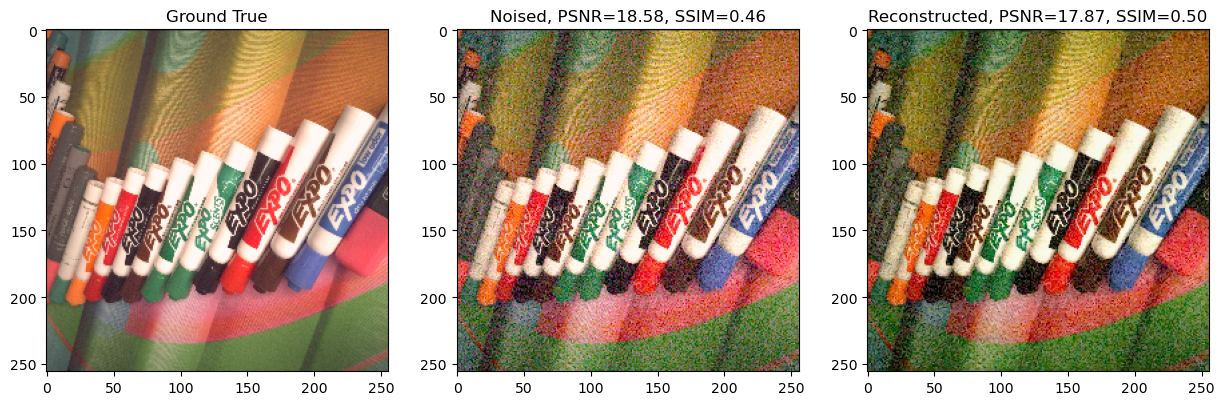

In [32]:
n=35
max_value=1
psnr, ssim = calc_mean_image_metrics(x_images_ssid_ref, y_ssid, max_value=max_value)
print (f'mean PSNR={psnr}')
print (f'mean SSIM={ssim}')
plot_result(x_images_ssid_ref[n],
            x_images_ssid_noised[n],
            y_ssid[n],
            max_value=max_value
           )